In [5]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("03-02-2018.csv")
df2 = pd.read_csv("02-16-2018.csv")

In [ ]:
df_dataset = pd.concat([df1, df2], axis=0, ignore_index=True)
del df1
del df2

In [ ]:
df_dataset


In [11]:
df_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [12]:
df_dataset["Label"].unique()

array(['Benign', 'Bot', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk'],
      dtype=object)

# 2- Removing row with erroneous 'Label' label and unnecessary columns¶

In [13]:
df_dataset.drop(df_dataset.loc[df_dataset["Label"] == "Label"].index, inplace=True)

In [14]:
df_dataset

Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0            443        6  02/03/2018 08:47:38        141385            9   
1          49684        6  02/03/2018 08:47:38           281            2   
2            443        6  02/03/2018 08:47:40        279824           11   
3            443        6  02/03/2018 08:47:40           132            2   
4            443        6  02/03/2018 08:47:41        274016            9   
...          ...      ...                  ...           ...          ...   
2097145       21        6  16/02/2018 10:36:33             3            1   
2097146       21        6  16/02/2018 10:36:33             3            1   
2097147       21        6  16/02/2018 10:36:33             3            1   
2097148       21        6  16/02/2018 10:36:33             5            1   
2097149       21        6  16/02/2018 10:36:33             2            1   

        Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0                  7             553          3773.0             202   
1                  1              38             0.0              38   
2                 15            1086         10527.0             385   
3                  0               0             0.0               0   
4                 13            1285          6141.0             517   
...              ...             ...             ...             ...   
2097145            1               0               0               0   
2097146            1               0               0               0   
2097147            1               0               0               0   
2097148            1               0               0               0   
2097149            1               0               0               0   

        Fwd Pkt Len Min  ... Fwd Seg Size Min Active Mean Active Std  \
0                     0  ...               20         0.0        0.0   
1                     0  ...               20         0.0        0.0   
2                     0  ...               20         0.0        0.0   
3                     0  ...               20         0.0        0.0   
4                     0  ...               20         0.0        0.0   
...                 ...  ...              ...         ...        ...   
2097145               0  ...               40           0        0.0   
2097146               0  ...               40           0        0.0   
2097147               0  ...               40           0        0.0   
2097148               0  ...               40           0        0.0   
2097149               0  ...               40           0        0.0   

        Active Max Active Min Idle Mean Idle Std Idle Max Idle Min  \
0              0.0        0.0       0.0      0.0      0.0      0.0   
1              0.0        0.0       0.0      0.0      0.0      0.0   
2              0.0        0.0       0.0      0.0      0.0      0.0   
3              0.0        0.0       0.0      0.0      0.0      0.0   
4              0.0        0.0       0.0      0.0      0.0      0.0   
...            ...        ...       ...      ...      ...      ...   
2097145          0          0         0      0.0        0        0   
2097146          0          0         0      0.0        0        0   
2097147          0          0         0      0.0        0        0   
2097148          0          0         0      0.0        0        0   
2097149          0          0         0      0.0        0        0   

                            Label  
0                          Benign  
1                          Benign  
2                          Benign  
3                          Benign  
4                          Benign  
...                           ...  
2097145  DoS attacks-SlowHTTPTest  
2097146  DoS attacks-SlowHTTPTest  
2097147  DoS attacks-SlowHTTPTest  
2097148  DoS attacks-SlowHTTPTest  
2097149  DoS attacks-SlowHTTPTest  

[2097149 rows x 80 columns]

# 3- Creating "Malicious" label from the "Bot", "DoS attacks-SlowHTTPTest", and "DoS attacks-Hulk" labels

In [15]:
df_dataset.replace(to_replace=["Bot", "DoS attacks-SlowHTTPTest", "DoS attacks-Hulk"], value="Malicious", inplace=True)

In [16]:
df_dataset["Label"].unique()

array(['Benign', 'Malicious'], dtype=object)

In [17]:
print(df_dataset["Label"].value_counts()[['Benign']].sum())
print(df_dataset["Label"].value_counts()[['Malicious']].sum())

1209156
887993


# 4. Replacing Benign labels with zeroes and Malicious labels with ones

In [18]:
df_dataset.replace(to_replace="Benign", value=0, inplace=True)
df_dataset.replace(to_replace="Malicious", value=1, inplace=True)

In [19]:
df_dataset

Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0            443        6  02/03/2018 08:47:38        141385            9   
1          49684        6  02/03/2018 08:47:38           281            2   
2            443        6  02/03/2018 08:47:40        279824           11   
3            443        6  02/03/2018 08:47:40           132            2   
4            443        6  02/03/2018 08:47:41        274016            9   
...          ...      ...                  ...           ...          ...   
2097145       21        6  16/02/2018 10:36:33             3            1   
2097146       21        6  16/02/2018 10:36:33             3            1   
2097147       21        6  16/02/2018 10:36:33             3            1   
2097148       21        6  16/02/2018 10:36:33             5            1   
2097149       21        6  16/02/2018 10:36:33             2            1   

        Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0                  7             553          3773.0             202   
1                  1              38             0.0              38   
2                 15            1086         10527.0             385   
3                  0               0             0.0               0   
4                 13            1285          6141.0             517   
...              ...             ...             ...             ...   
2097145            1               0               0               0   
2097146            1               0               0               0   
2097147            1               0               0               0   
2097148            1               0               0               0   
2097149            1               0               0               0   

        Fwd Pkt Len Min  ... Fwd Seg Size Min Active Mean Active Std  \
0                     0  ...               20         0.0        0.0   
1                     0  ...               20         0.0        0.0   
2                     0  ...               20         0.0        0.0   
3                     0  ...               20         0.0        0.0   
4                     0  ...               20         0.0        0.0   
...                 ...  ...              ...         ...        ...   
2097145               0  ...               40           0        0.0   
2097146               0  ...               40           0        0.0   
2097147               0  ...               40           0        0.0   
2097148               0  ...               40           0        0.0   
2097149               0  ...               40           0        0.0   

        Active Max Active Min Idle Mean Idle Std Idle Max Idle Min Label  
0              0.0        0.0       0.0      0.0      0.0      0.0     0  
1              0.0        0.0       0.0      0.0      0.0      0.0     0  
2              0.0        0.0       0.0      0.0      0.0      0.0     0  
3              0.0        0.0       0.0      0.0      0.0      0.0     0  
4              0.0        0.0       0.0      0.0      0.0      0.0     0  
...            ...        ...       ...      ...      ...      ...   ...  
2097145          0          0         0      0.0        0        0     1  
2097146          0          0         0      0.0        0        0     1  
2097147          0          0         0      0.0        0        0     1  
2097148          0          0         0      0.0        0        0     1  
2097149          0          0         0      0.0        0        0     1  

[2097149 rows x 80 columns]

In [20]:
print(df_dataset["Label"].value_counts()[[0]].sum())
print(df_dataset["Label"].value_counts()[[1]].sum())

1209156
887993


In [21]:
df_dataset.describe()

Label
count  2.097149e+06
mean   4.234287e-01
std    4.941022e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00

In [22]:
constant_cols = df_dataset.columns[(df_dataset != df_dataset.iloc[0]).all()]
print(constant_cols)

Index([], dtype='object')


# Dropping columns

In [26]:
import matplotlib.pyplot as plt

Label
0    1209156
1     887993
dtype: int64


<AxesSubplot: xlabel='Label'>

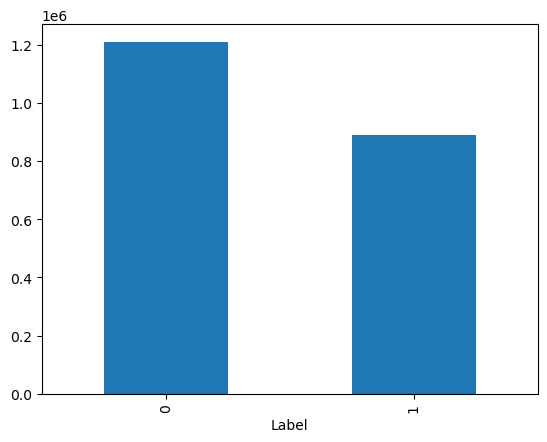

In [28]:
labels = df_dataset.value_counts('Label')
print(labels)
labels.plot(kind='bar')

Checking for null value

In [23]:
null_col = []
check_null = df_dataset.isnull().sum()
for indx, val in check_null.items():
    if val != 0:
        print('\'' + indx + '\' has ' + str(val) + ' null values!!')
        null_col.append(indx)


'Flow Byts/s' has 2558 null values!!


In [24]:
for i in null_col :
    print(i)
    print(df_dataset[i].describe())
    npercent = df_dataset[i].isnull().sum()/len(df_dataset[i]) * 100
    print('nan% :',npercent)
    print('\n')

Flow Byts/s
count     2094591.0
unique     924646.0
top             0.0
freq       905084.0
Name: Flow Byts/s, dtype: float64
nan% : 0.12197511955516752




In [25]:



# Convert 'Flow Byts/s' to numeric, forcing non-numeric values to NaN
df_dataset['Flow Byts/s'] = pd.to_numeric(df_dataset['Flow Byts/s'], errors='coerce')

# Check and print the mean value for 'Flow Byts/s'
mean_value = df_dataset['Flow Byts/s'].mean()
print('Filling \'Flow Byts/s\' nan values with mean:', mean_value)

# Fill NaN values with the mean
df_dataset['Flow Byts/s'].fillna(mean_value, inplace=True)


Filling 'Flow Byts/s' nan values with mean: inf


In [26]:
print('Filling \'Flow Byts/s\' nan values with mean :',df_dataset['Flow Byts/s'].mean())

df_dataset['Flow Byts/s'].fillna(df_dataset['Flow Byts/s'].mean(),inplace=True)

Filling 'Flow Byts/s' nan values with mean : inf


In [34]:
import numpy as np


map = df_dataset.dtypes
indx_set = set(map.values.astype(str))

datatype_dict = {i: [] for i in indx_set}

for indx, val in df_dataset.dtypes.iteritems():
    datatype_dict[str(val)].append(indx)

print('Columns with object datatype: \n', datatype_dict.get('object', []), '\n')
print('Columns with int64 datatype: \n', np.array(datatype_dict.get('int64', [])), '\n')
print('Columns with float64 datatype: \n', np.array(datatype_dict.get('float64', [])))


Columns with object datatype: 
 ['Timestamp', 'Label'] 

Columns with int64 datatype: 
 [] 

Columns with float64 datatype: 
 ['TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max' 'Fwd Pkt Len Min'
 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max' 'Bwd Pkt Len Min'
 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow IAT Mean' 'Flow IAT Std'
 'Flow IAT Max' 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std'
 'Fwd IAT Max' 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std'
 'Bwd IAT Max' 'Bwd IAT Min' 'Fwd Pkts/s' 'Bwd Pkts/s' 'Pkt Len Min'
 'Pkt Len Max' 'Pkt Len Mean' 'Pkt Len Std' 'Pkt Len Var' 'Down/Up Ratio'
 'Pkt Size Avg' 'Fwd Seg Size Avg' 'Bwd Seg Size Avg' 'Fwd Byts/b Avg'
 'Fwd Pkts/b Avg' 'Fwd Blk Rate Avg' 'Bwd Byts/b Avg' 'Bwd Pkts/b Avg'
 'Bwd Blk Rate Avg' 'Active Mean' 'Active Std' 'Active Max' 'Active Min'
 'Idle Mean' 'Idle Std' 'Idle Max' 'Idle Min']


/tmp/ipykernel_39560/3362718038.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for indx, val in df_dataset.dtypes.iteritems():


In [28]:
columns_to_drop = [
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'Flow Byts/s',  # This field had np.inf values during training, as such was removed
    'Flow Pkts/s',
    'FIN Flag Cnt',
]

In [29]:
df_dataset.drop(columns=columns_to_drop, inplace=True)

In [30]:
column_names = df_dataset.columns
print("Column names:", column_names)
number_of_columns = len(df_dataset.columns)
print("Number of columns:", number_of_columns)





Column names: Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bw

# Converting Timestamp from object to datetime

In [33]:
import pandas as pd

# Define the conversion lists
int64_columns = [
    'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 
    'Tot Bwd Pkts', 'Fwd Header Len', 'Bwd Header Len', 'SYN Flag Cnt',
    'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 
    'CWE Flag Count', 'ECE Flag Cnt', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
    'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts',
    'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min'
]

float64_columns = [
    'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 
    'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 
    'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 
    'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 
    'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 
    'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 
    'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 
    'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 
    'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 
    'Bwd Blk Rate Avg', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 
    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min'
]

object_columns = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']

# Print all column names to check
print(df_dataset.columns)

# Convert columns to int64
for col in int64_columns:
    if col in df_dataset.columns:
        df_dataset[col] = pd.to_numeric(df_dataset[col], errors='coerce').astype('Int64')

# Convert columns to float64
for col in float64_columns:
    if col in df_dataset.columns:
        df_dataset[col] = pd.to_numeric(df_dataset[col], errors='coerce').astype('float64')

# Ensure object columns remain as object
for col in object_columns:
    if col in df_dataset.columns:
        df_dataset[col] = df_dataset[col].astype('object')

# Verify the conversion
print(df_dataset.dtypes)


Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg',

In [36]:
df_dataset['Timestamp'] = pd.to_datetime(df_dataset['Timestamp'])
df_dataset['Timestamp'].describe(datetime_is_numeric=True)

count                          2097149
mean     2018-02-09 17:05:00.776776192
min                2018-02-03 01:00:00
25%                2018-02-03 08:53:24
50%                2018-02-03 12:59:59
75%                2018-02-16 01:47:17
max                2018-02-16 12:58:24
Name: Timestamp, dtype: object

In [38]:
map = df_dataset.dtypes
indx_set = set(map.values.astype(str))

datatype_dict = {i: [] for i in indx_set}

for indx, val in df_dataset.dtypes.iteritems():
    datatype_dict[str(val)].append(indx)

print('Columns with object datatype: \n', datatype_dict.get('object', []), '\n')
print('Columns with int64 datatype: \n', np.array(datatype_dict.get('Int64', [])), '\n')
print('Columns with float64 datatype: \n', np.array(datatype_dict.get('float64', [])))


Columns with object datatype: 
 ['Label'] 

Columns with int64 datatype: 
 ['Dst Port' 'Protocol' 'Flow Duration' 'Tot Fwd Pkts' 'Tot Bwd Pkts'
 'Fwd Header Len' 'Bwd Header Len' 'SYN Flag Cnt' 'RST Flag Cnt'
 'PSH Flag Cnt' 'ACK Flag Cnt' 'URG Flag Cnt' 'CWE Flag Count'
 'ECE Flag Cnt' 'Subflow Fwd Pkts' 'Subflow Fwd Byts' 'Subflow Bwd Pkts'
 'Subflow Bwd Byts' 'Init Fwd Win Byts' 'Init Bwd Win Byts'
 'Fwd Act Data Pkts' 'Fwd Seg Size Min'] 

Columns with float64 datatype: 
 ['TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max' 'Fwd Pkt Len Min'
 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max' 'Bwd Pkt Len Min'
 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow IAT Mean' 'Flow IAT Std'
 'Flow IAT Max' 'Flow IAT Min' 'Fwd IAT Tot' 'Fwd IAT Mean' 'Fwd IAT Std'
 'Fwd IAT Max' 'Fwd IAT Min' 'Bwd IAT Tot' 'Bwd IAT Mean' 'Bwd IAT Std'
 'Bwd IAT Max' 'Bwd IAT Min' 'Fwd Pkts/s' 'Bwd Pkts/s' 'Pkt Len Min'
 'Pkt Len Max' 'Pkt Len Mean' 'Pkt Len Std' 'Pkt Len Var' 'Down/Up Ratio'
 'Pkt Size Avg

/tmp/ipykernel_39560/1906210967.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for indx, val in df_dataset.dtypes.iteritems():


# Checking Correlation

In [39]:
def max_correlation(correlations, limit=0.9):
    columns = correlations.columns
    col_set = set()
    for i in range(correlations.shape[0]):
        for j in range(i+1, correlations.shape[0]):
            if correlations.iloc[i,j] >= limit:
                print(f"{columns[i]} {' | '} {columns[j]} {correlations.iloc[i,j]}")
                col_set.add(columns[i])
                col_set.add(columns[j])
    return

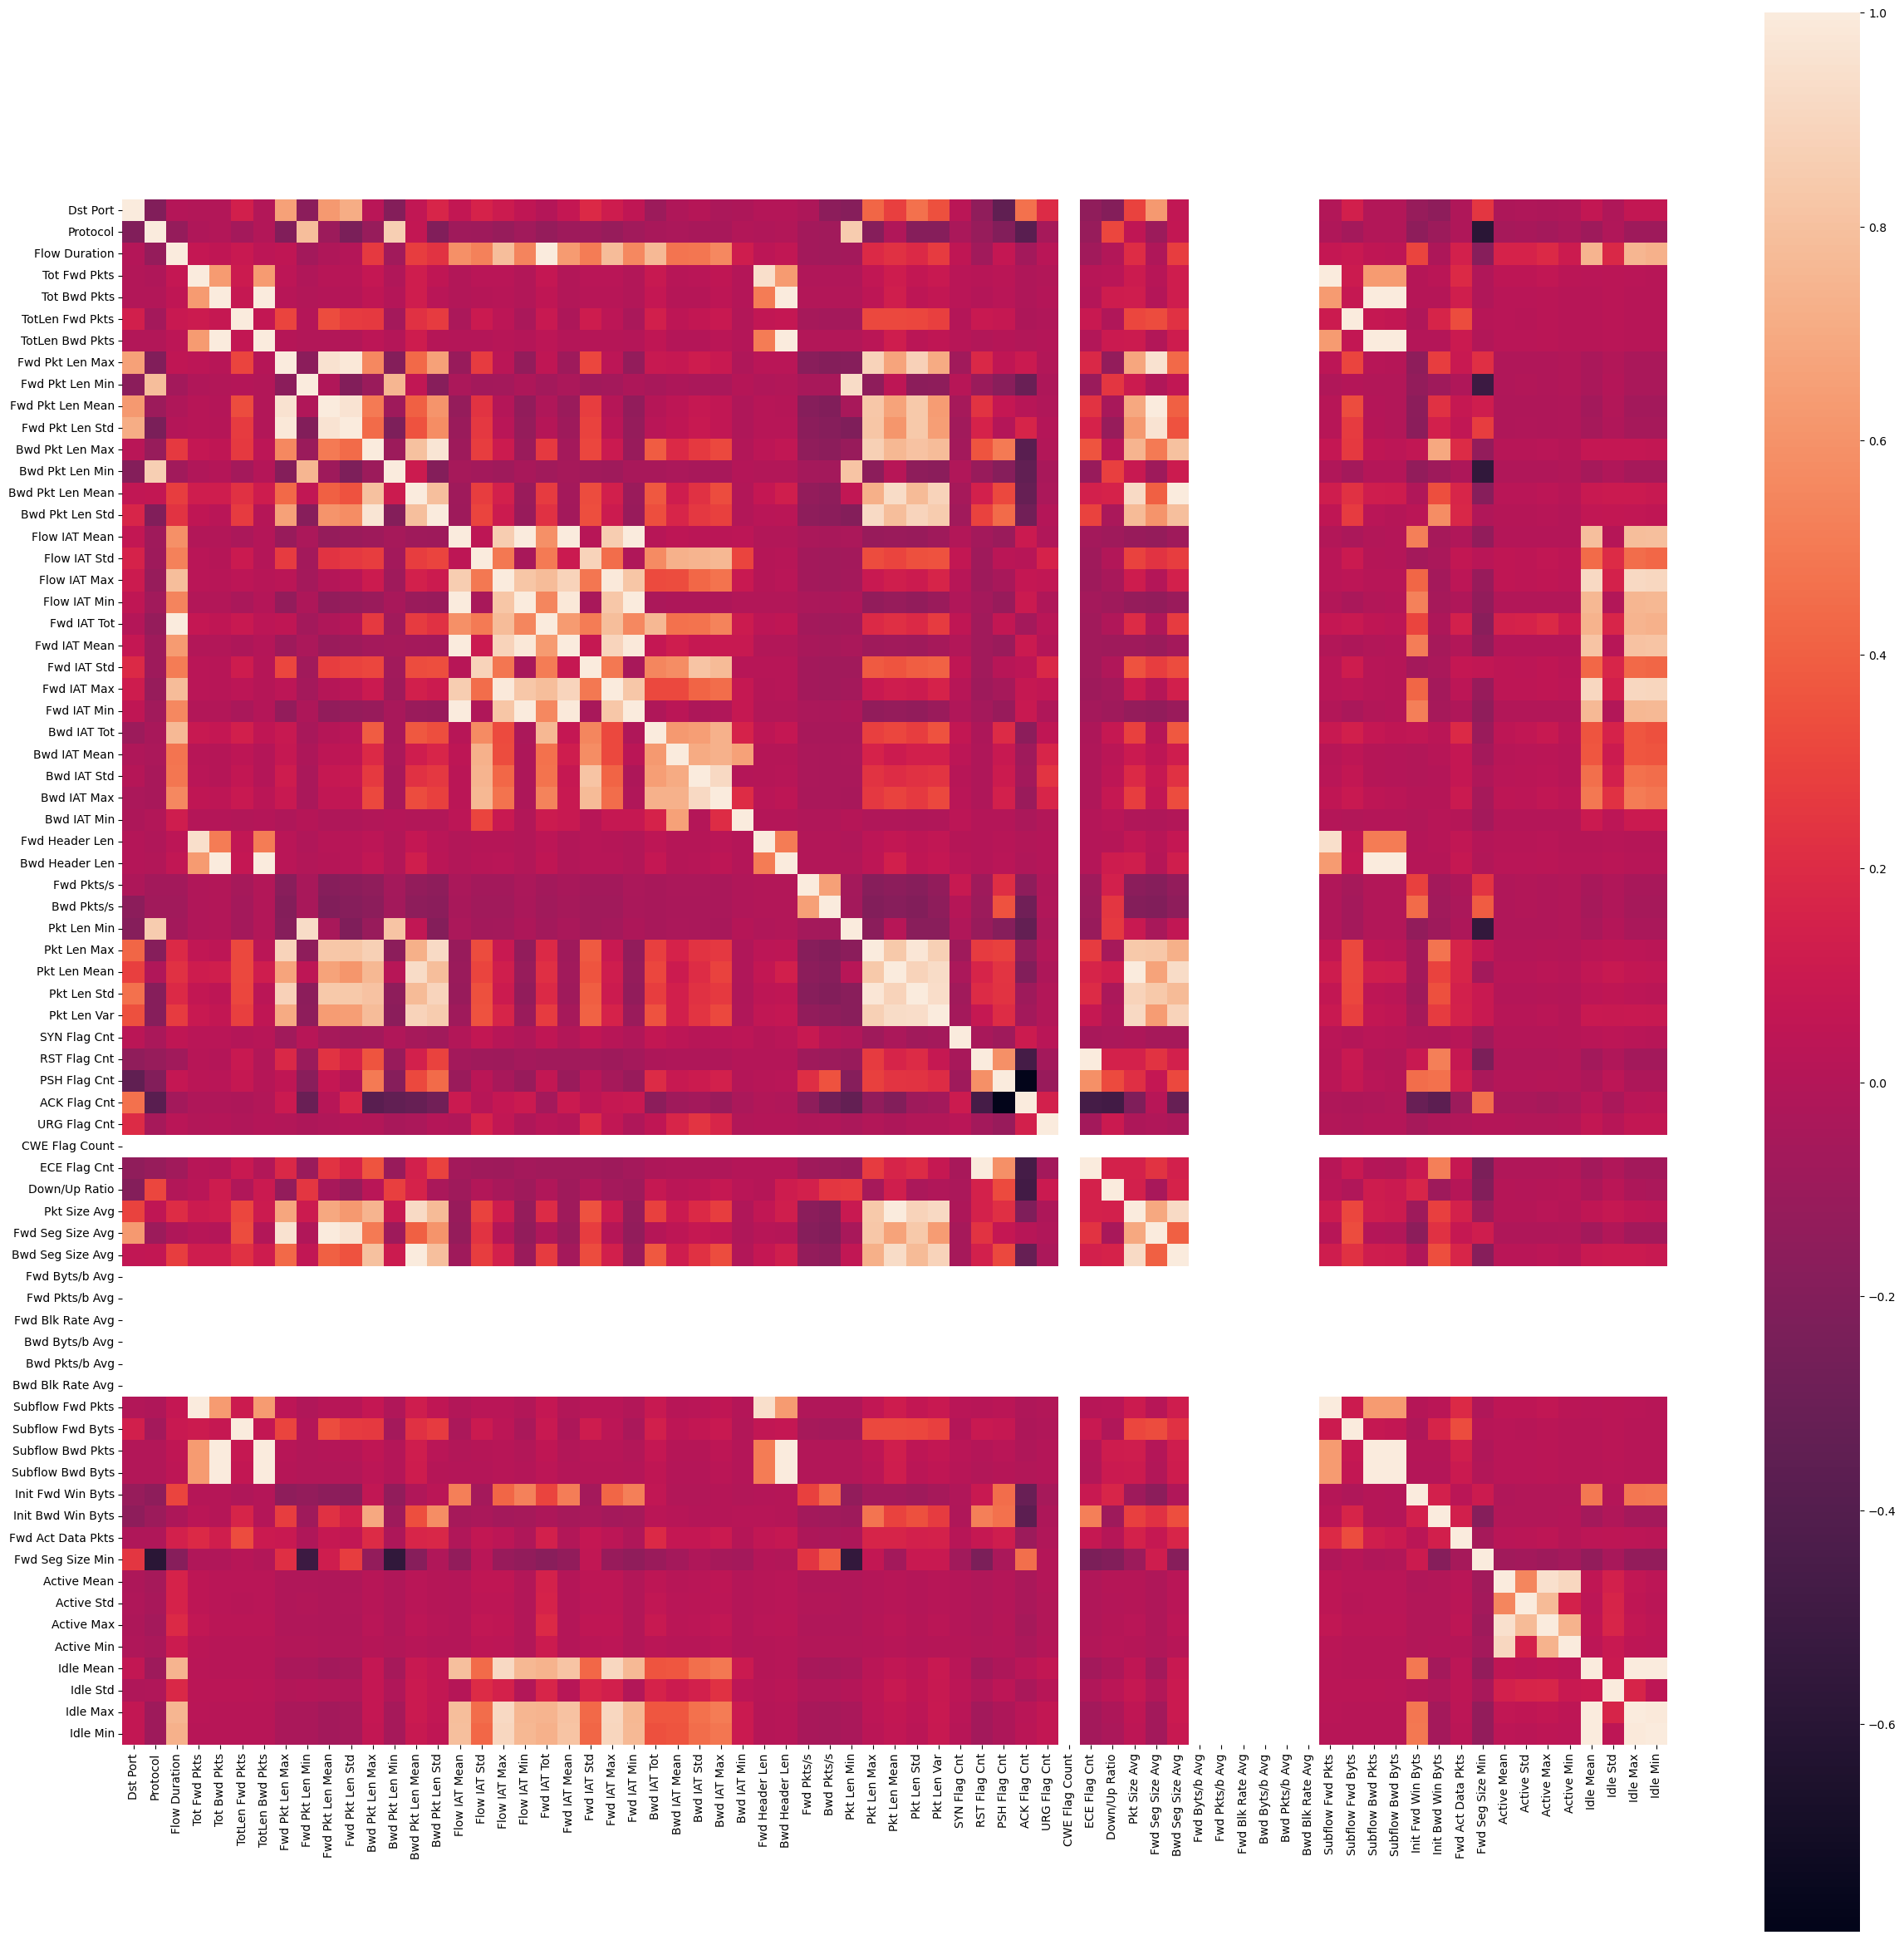

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed


# Option 2: Select only numeric columns (recommended)
numeric_columns = df_dataset.select_dtypes(include=['int64', 'float64'])
correlation_matrix1 = numeric_columns.corr()

# Create a large figure for the heatmap
fig = plt.figure(figsize=(30, 30))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix1, square=True)

# Display the plot
plt.show()


In [47]:
max_correlation(correlation_matrix1, limit=0.99)

Flow Duration  |  Fwd IAT Tot 0.9954818179920409
Tot Fwd Pkts  |  Subflow Fwd Pkts 1.0
Tot Bwd Pkts  |  TotLen Bwd Pkts 0.9988181372956517
Tot Bwd Pkts  |  Bwd Header Len 0.998068300437139
Tot Bwd Pkts  |  Subflow Bwd Pkts 1.0
Tot Bwd Pkts  |  Subflow Bwd Byts 0.9988224129839071
TotLen Fwd Pkts  |  Subflow Fwd Byts 1.0
TotLen Bwd Pkts  |  Bwd Header Len 0.99803048351521
TotLen Bwd Pkts  |  Subflow Bwd Pkts 0.9988181372956516
TotLen Bwd Pkts  |  Subflow Bwd Byts 0.9999987257802242
Fwd Pkt Len Mean  |  Fwd Seg Size Avg 1.0
Bwd Pkt Len Mean  |  Bwd Seg Size Avg 1.000000000000001
Flow IAT Mean  |  Flow IAT Min 0.9951865622167163
Flow IAT Mean  |  Fwd IAT Mean 0.9940779199581578
Flow IAT Mean  |  Fwd IAT Min 0.9937736150368716
Flow IAT Max  |  Fwd IAT Max 0.9908440665590836
Flow IAT Min  |  Fwd IAT Min 0.9944529575912101
Fwd IAT Mean  |  Fwd IAT Min 0.9901598603740005
Bwd Header Len  |  Subflow Bwd Pkts 0.9980683004371392
Bwd Header Len  |  Subflow Bwd Byts 0.9980306964560453
Pkt Len Mean  

In [62]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Select only numeric columns for correlation calculation
numeric_columns = df_dataset.select_dtypes(include=['int64', 'float64'])
corr = numeric_columns.corr()

# Initialize an array to keep track of columns to retain
columns = np.full((df_dataset.shape[1],), True, dtype=bool)
numeric_col_indices = [df_dataset.columns.get_loc(col) for col in numeric_columns.columns]

# Identify highly correlated columns
remove_col = []
for i in tqdm(range(corr.shape[0])):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i, j] >= 0.9:
            if columns[numeric_col_indices[j]]:
                columns[numeric_col_indices[j]] = False
                remove_col.append(numeric_columns.columns[j])

# Output the number of correlated columns and their names
print('No. of correlated columns:\n', len(remove_col))
print('\nRemoving following correlated columns:\n', np.array(remove_col))

# Select columns that are not highly correlated
selected_columns = df_dataset.columns[columns]
df = df_dataset[selected_columns]

# Output the shape of the new DataFrame to verify the columns have been removed
print('Shape of DataFrame before removal:', df_dataset.shape)
print('Shape of DataFrame after removal:', df.shape)

# Optionally save the cleaned dataset to a new CSV file
# df.to_csv('cleaned_data.csv', index=False)



100%|██████████████████████████████████████████| 71/71 [00:00<00:00, 799.43it/s]


No. of correlated columns:
 30

Removing following correlated columns:
 ['Fwd IAT Tot' 'Fwd Header Len' 'Subflow Fwd Pkts' 'TotLen Bwd Pkts'
 'Bwd Header Len' 'Subflow Bwd Pkts' 'Subflow Bwd Byts' 'Subflow Fwd Byts'
 'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Fwd Seg Size Avg' 'Pkt Len Min'
 'Bwd Pkt Len Std' 'Pkt Len Mean' 'Pkt Size Avg' 'Bwd Seg Size Avg'
 'Pkt Len Max' 'Flow IAT Min' 'Fwd IAT Mean' 'Fwd IAT Min' 'Fwd IAT Max'
 'Idle Mean' 'Idle Max' 'Idle Min' 'Bwd IAT Max' 'Pkt Len Std'
 'Pkt Len Var' 'ECE Flag Cnt' 'Active Max' 'Active Min']
Shape of DataFrame before removal: (2097149, 73)
Shape of DataFrame after removal: (2097149, 43)


In [65]:
print('Number of columns left\n', len(df.columns))
print('\nColumns left:\n', df.columns)

Number of columns left
 43

Columns left:
 Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Min',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'Down/Up Ratio', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Idle Std', 'Label'],
      dtype='object')


We reduced our dataset's dimension from 72 to 43 by dropping highly correlated columns.

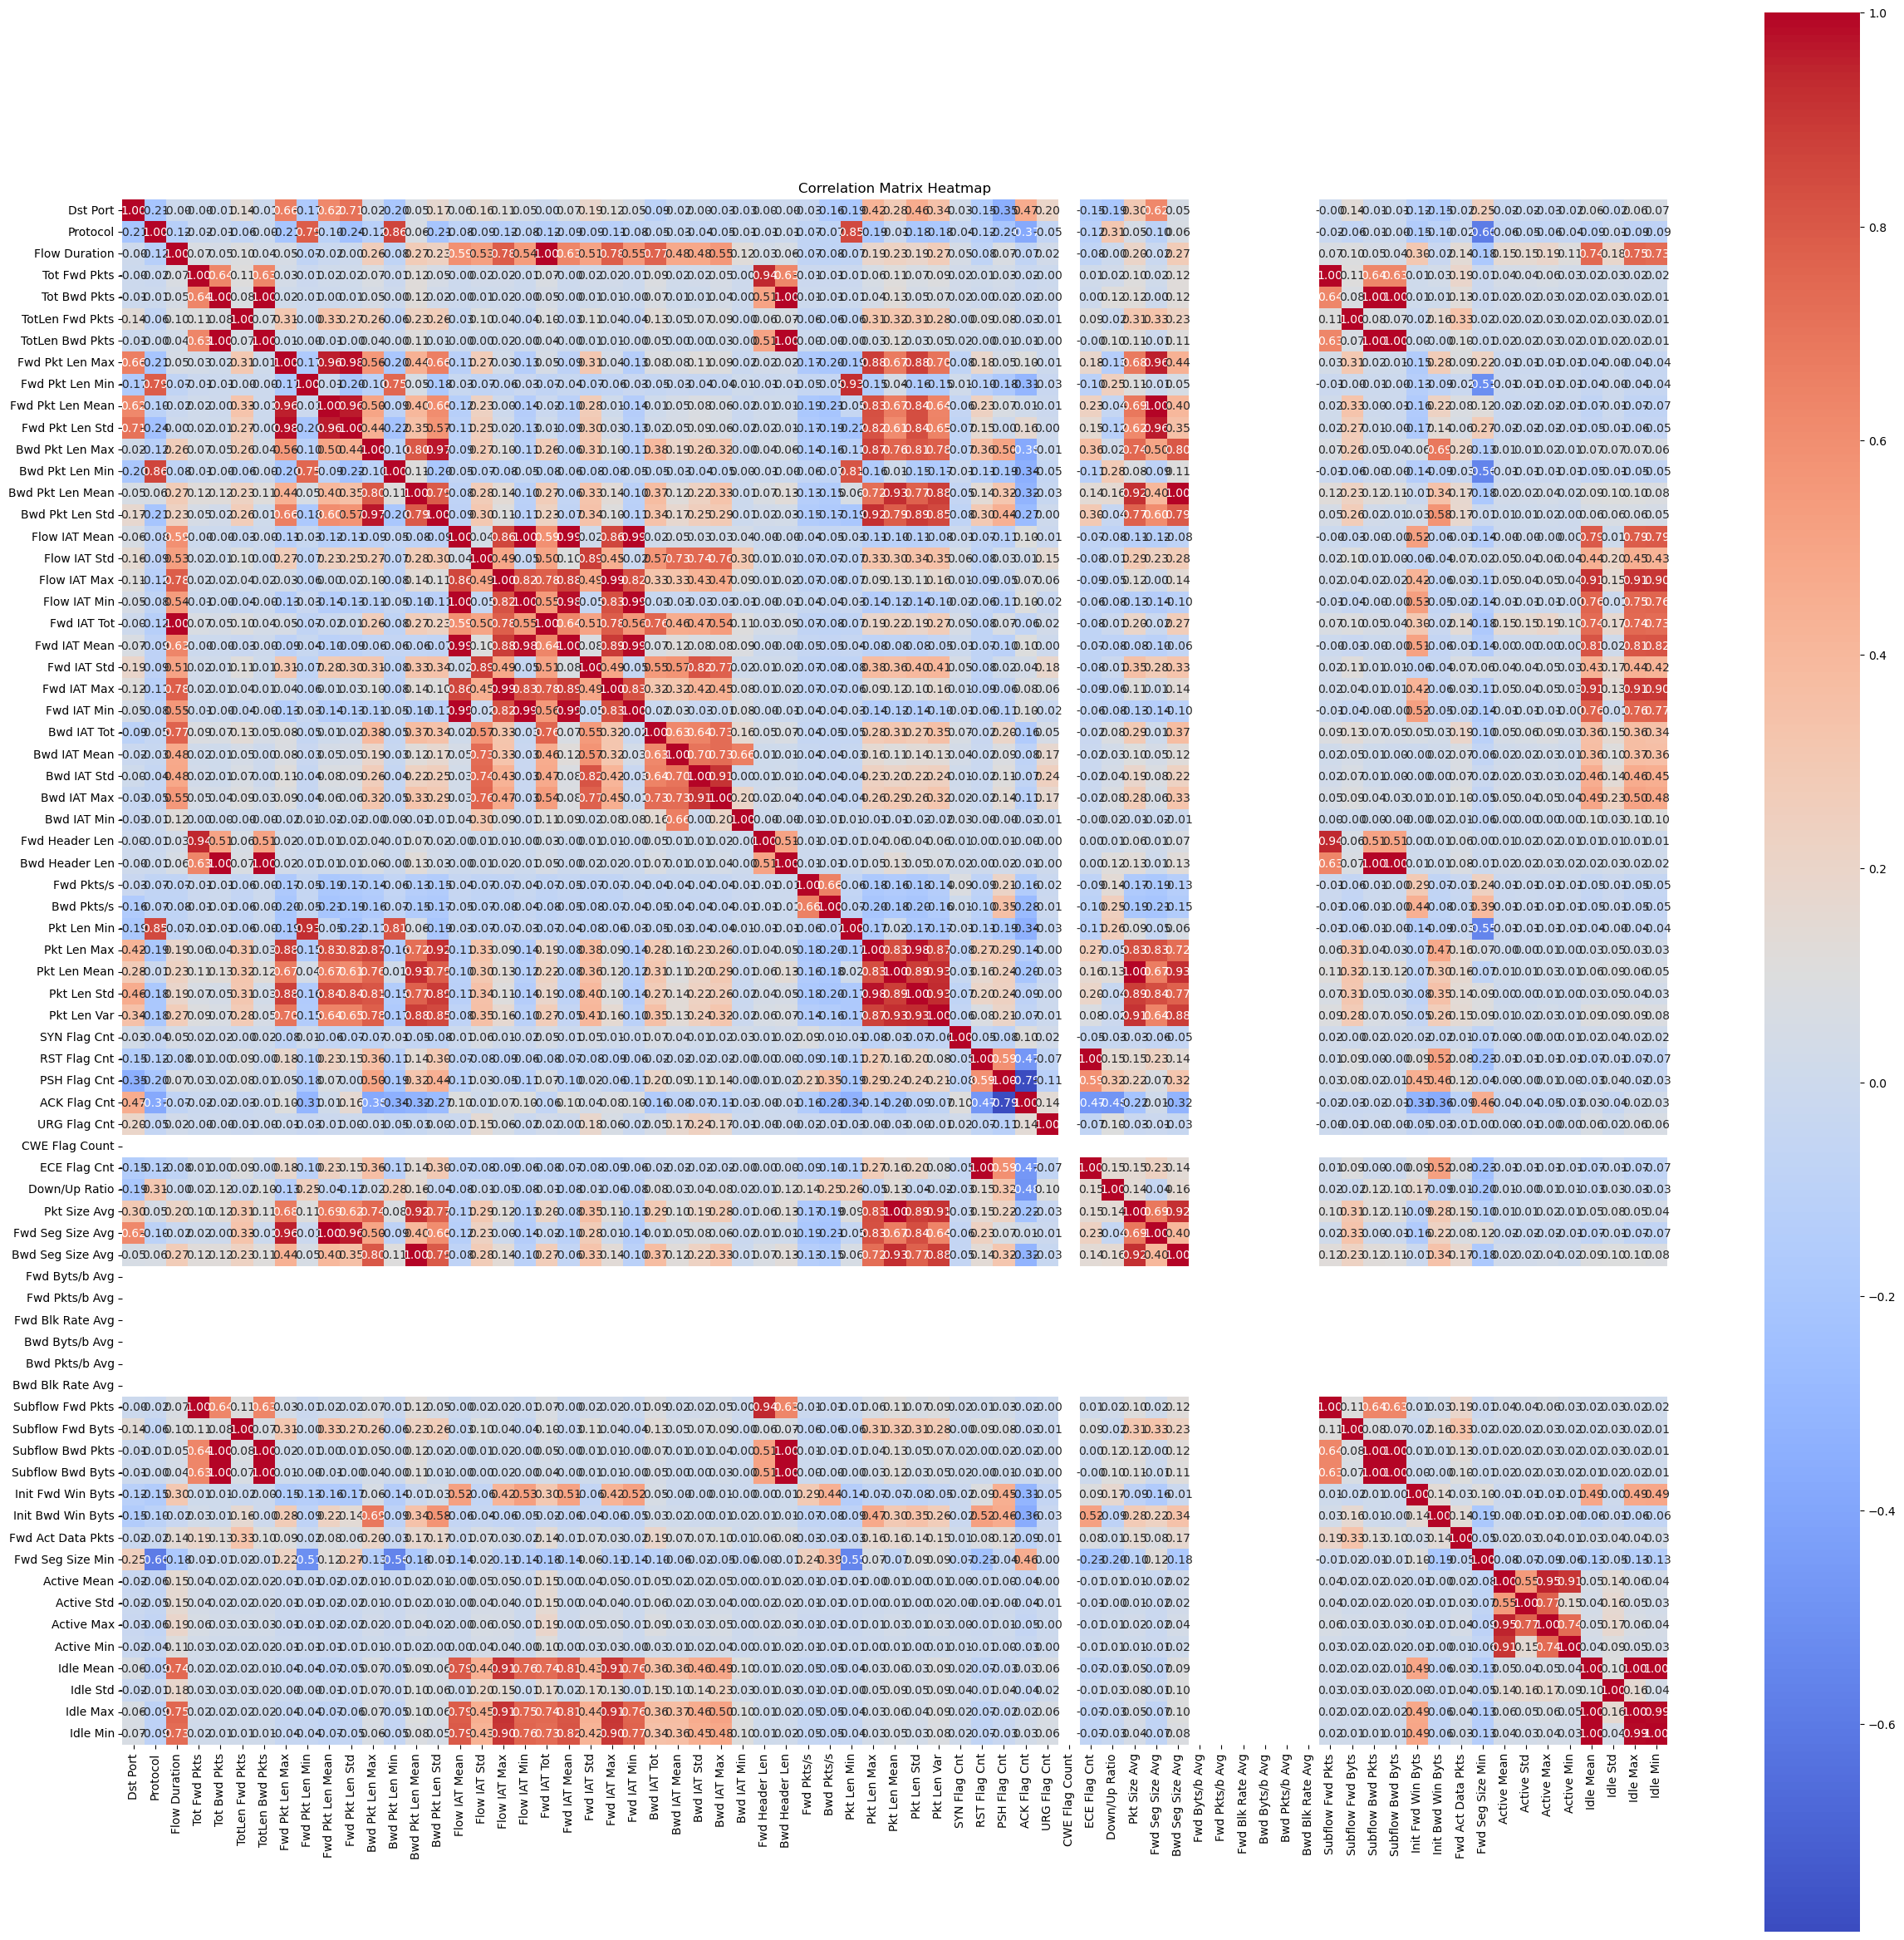

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_dataset.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
df_corr = numeric_df.corr()

# Plot the heatmap
fig = plt.figure(figsize=(30, 30))
sns.heatmap(df_corr, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


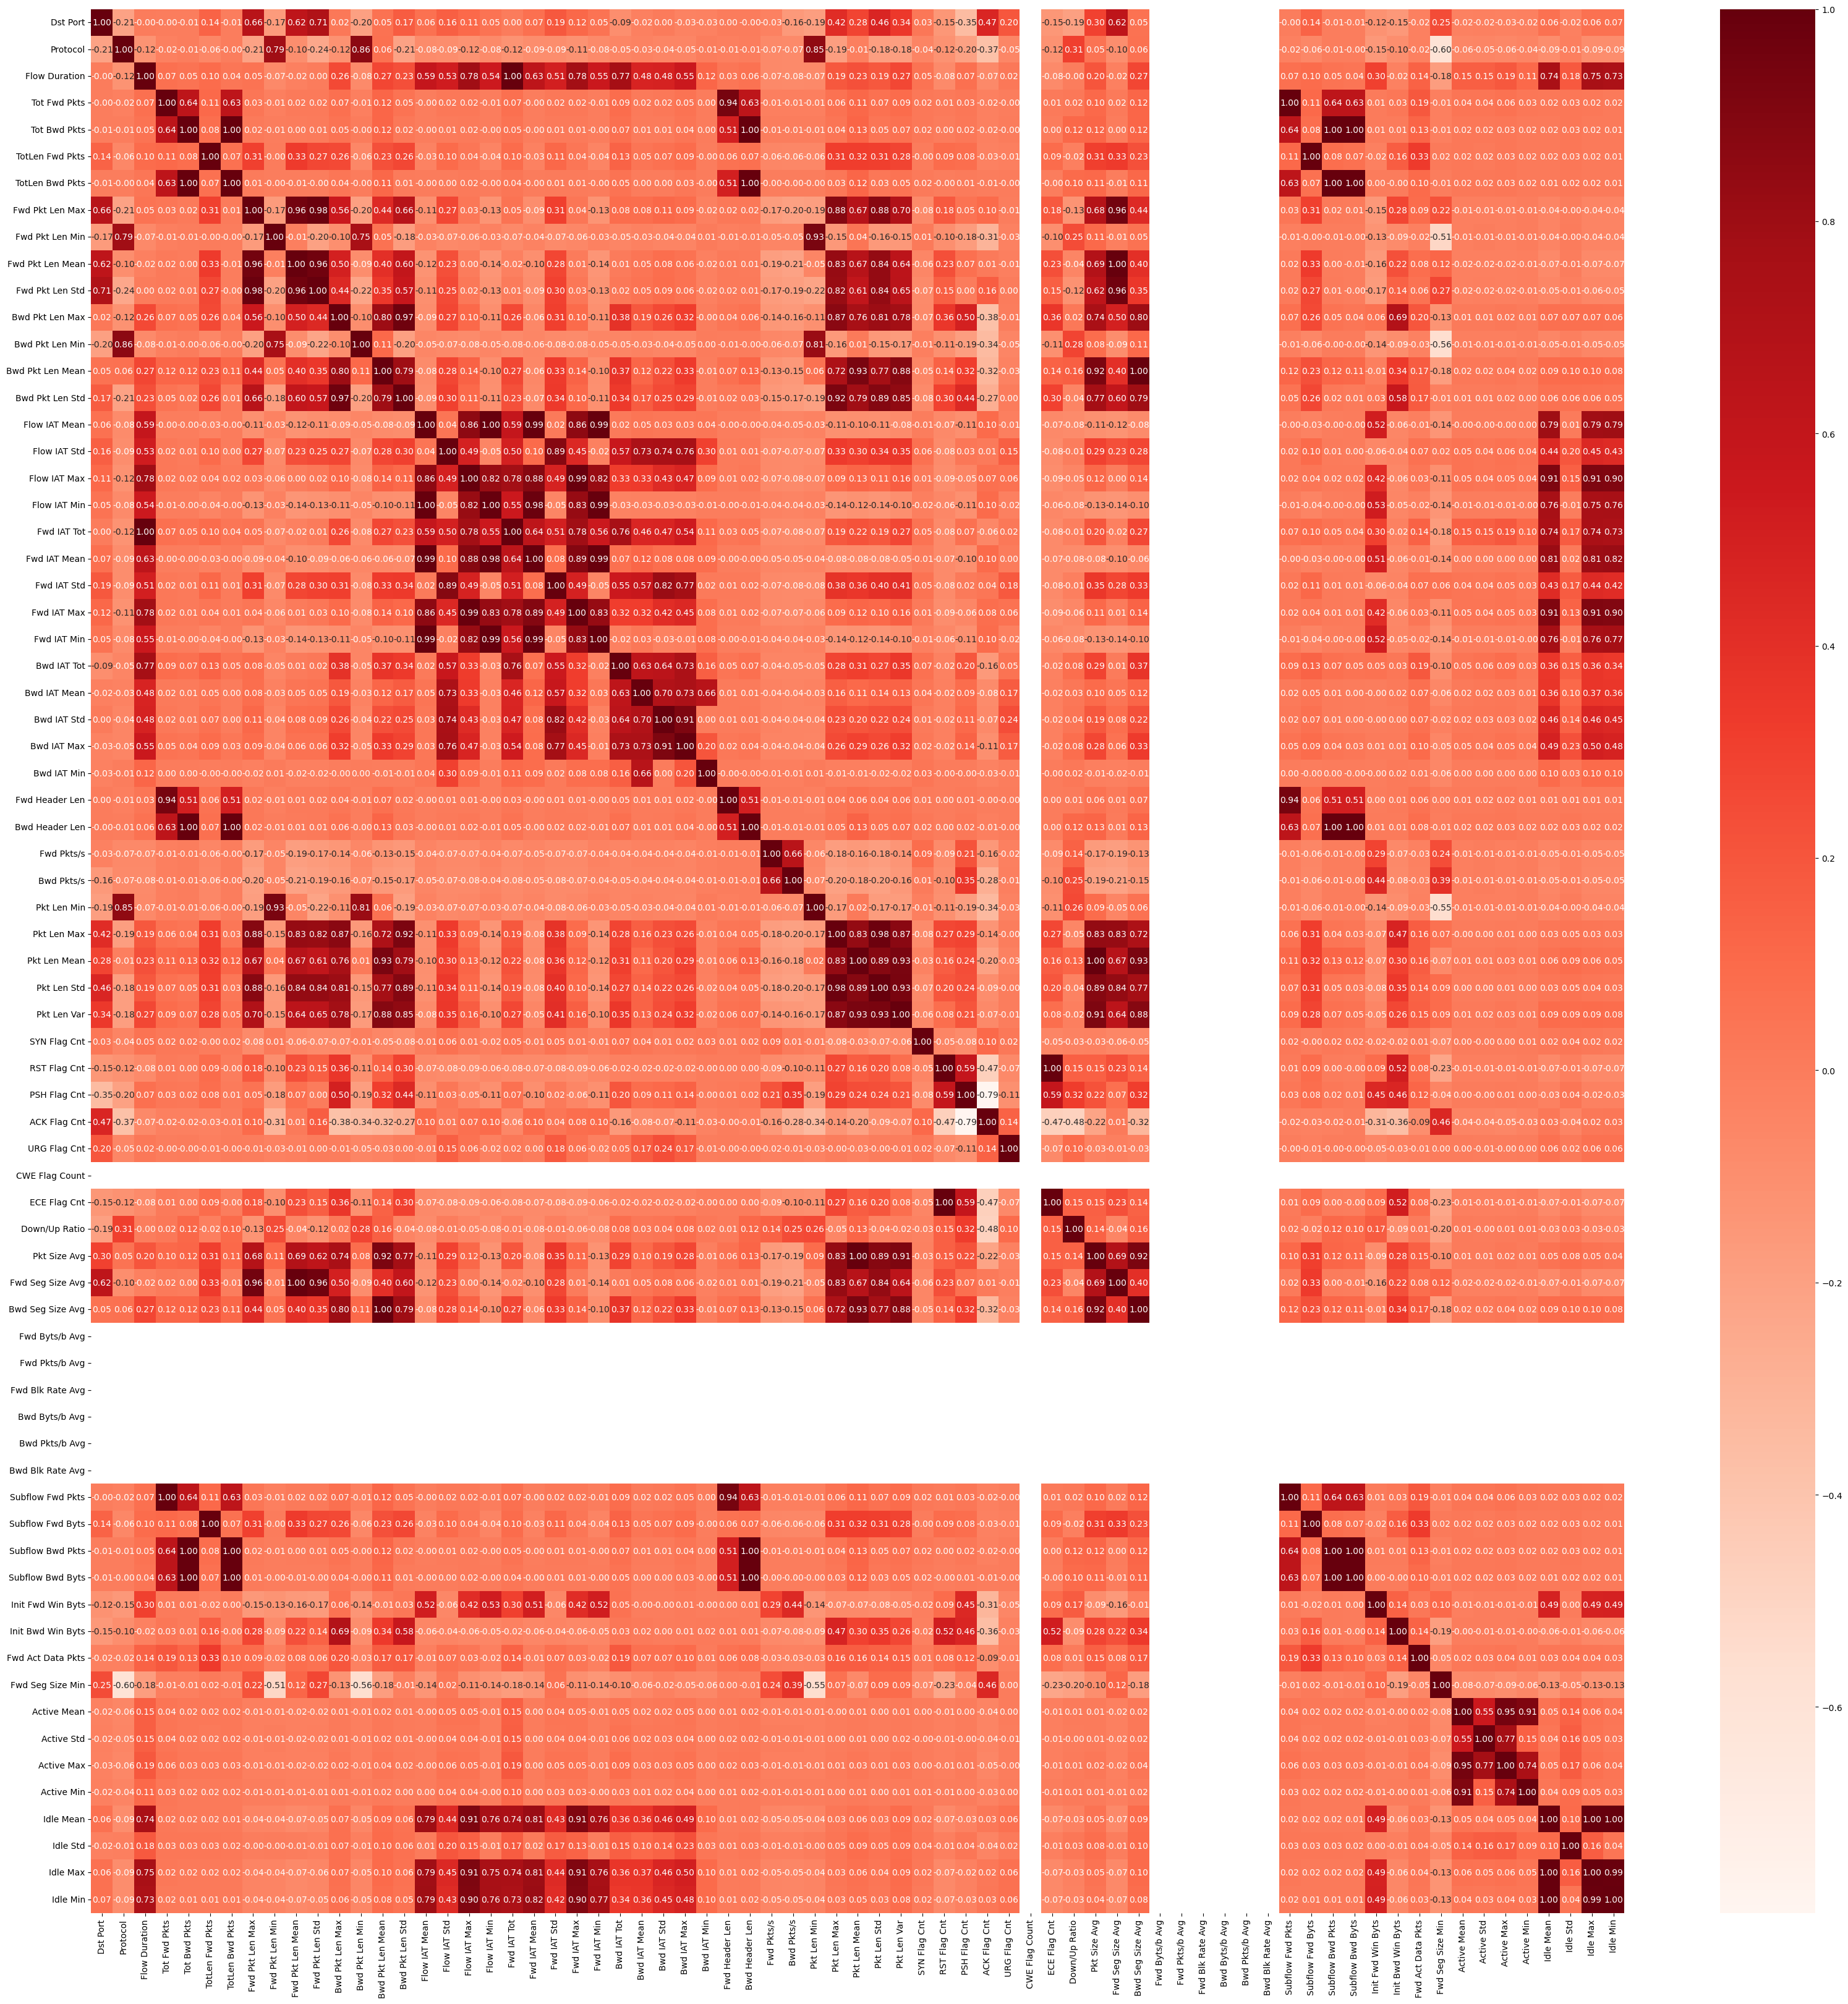

In [71]:
plt.figure(figsize=(40,40))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.Reds,fmt='.2f')
plt.show()

In [72]:
df_dataset.to_csv("modified_dataset.csv", index=False)